# 범주형 변수 문제
---
- 데이터에 `범주형 변수` 가 포함되어 있어, 대다수의 지도학습 모델이 학습되지 않거나, `비정상적으로` 학습되는 문제


e.g)
 - 1) str타입의 범주형 변수가 포함되면 대다수의 지도 학습 모델 자체가 학습이 되지 않는다.
 - 2) int혹은 float 타입의 범주형 변수는 (타이타닉의 Pclass) 모델 학습은 되지만 비정상적으로 학습되는 것이 대부분이다.
---

- 적절한 모델학습을 위해서 `범주형 변수는 반드시 숫자로 변환` 되어야 한다.
- 하지만 그 변환을 분석가가 임의로 설정하는 것은 부적절하다.
e.g)
    - 종교 변수가 있을때, 천주교 =1, 기독교=2, 불교=3 이라고 하는 경우
    - (가정) 불교는 천주교의 3배 인것이 아니지만, 숫자로 임의 변경이 되어 모델이 잘못된 인식을 할 수 있다.

---
**특히 `코드화된 범주형 변수` 는 적절한 숫자로 변환을 해줘야 한다**

## 범주형 변수 판별 방법
---

- 범주형 변수는 `상태 공간의 크기가 유한한` 변수를 의미
- 반드시 도메인 지식이나, 변수의 상태공간을 바탕으로 판별해야 한다.
- **특히, `int 혹은 float 타입의 변수는 무조건 연속형 변수다` 라는 고정관념에 주의해야 한다.**


e.g)
- 월(month)는 숫자이지만, 범주형 변수이다.
- 타이타닉의 Pclass는 unique() 값이 1,2,3 으로 범주형 변수이다.

# 관련 문법 : Series.unique() with len()
---
- Series에 포함된 unique한 값을 ndarray형태로 반환 해주는 함수
- 주로, 상태 공간을 확인하는데 사용한다.
---

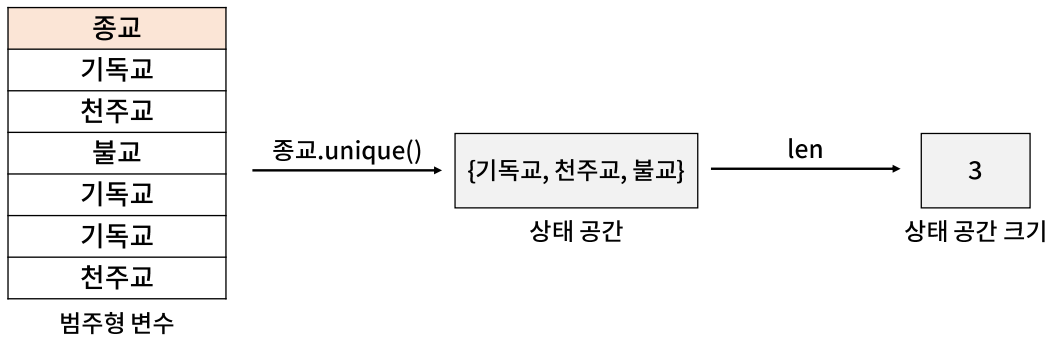

# 범주형 변수 변환 방법을 선택하는 기준

- 범주형 변수의 크기를 판별했을때
    - 상태 공간이 크기가 작다면 => Dummy화(방법1)
    - 상태 공간의 크기가 크다면 => 연속형 변수로 치환(방법2)

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

데이터 로드
- 중고차 품질을 판단하는 실습용 data

In [2]:
df = pd.read_csv("car-good.csv")

In [3]:
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,negative
1,vhigh,vhigh,2,2,small,med,negative
2,vhigh,vhigh,2,2,small,high,negative
3,vhigh,vhigh,2,2,med,low,negative
4,vhigh,vhigh,2,2,med,med,negative


In [4]:
# 특징과 라벨 분리
X = df.drop('Class', axis = 1)
Y = df['Class']

In [5]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [6]:
# label 데이터 개수 확인
Train_Y.value_counts()

negative    630
positive     18
Name: Class, dtype: int64

In [7]:
# 문자 label을 숫자로 치환 
# inplace = True 로 바로 원본데이터에 적용
Train_Y.replace({"negative":-1, "positive":1}, inplace = True)
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

In [8]:
Train_X.head()
# Buying, Maint, Lug_boot, safety 변수가 범주형 변수로 판단된다.
# 엄밀히는 범주형 보다는 서열형

,Buying,Maint,Doors,Persons,Lug_boot,Safety
620,med,low,3,2,big,high
73,vhigh,high,3,2,small,med
749,low,high,4,4,small,high
750,low,high,4,4,med,low
96,vhigh,high,4,2,big,low


# unique함수로 상태공간 크기 확인

In [9]:
# 자세한 범주형 변수 판별 => 모든 변수가 범주형임을 확인 (unique한 데이터의 수가 원본데이터 수에 비해 매우 작음)
for col in Train_X.columns:
    print(col, len(Train_X[col].unique()))

Buying 4
Maint 4
Doors 3
Persons 2
Lug_boot 3
Safety 3


# 범주형 변수 변환방법(1) - 더미화
---
- 가장 일반적인 범주형 변수를 변환하는 방법
- 범주형 변수가 특정 값을 취하는지 여부를 0 또는 1로 하는 dummy변수를 생성하는 방식
- 일반적으로 마지막 dummy는 제거 한다. 
    - 경우의 수로 나머지 dummy들로 추론이 가능함
    - 변수간의 상관성 제거를 할 수 있다.
    - 계산량 감소를 기대할 수 있다.
- 예외적으로, Tree 기반 모델 (Decision Tree, Random Forest 등) 에서는 '설명력'을 높이기 위해 마지막 dummy를 그대로 사용하기도 한다.    

---
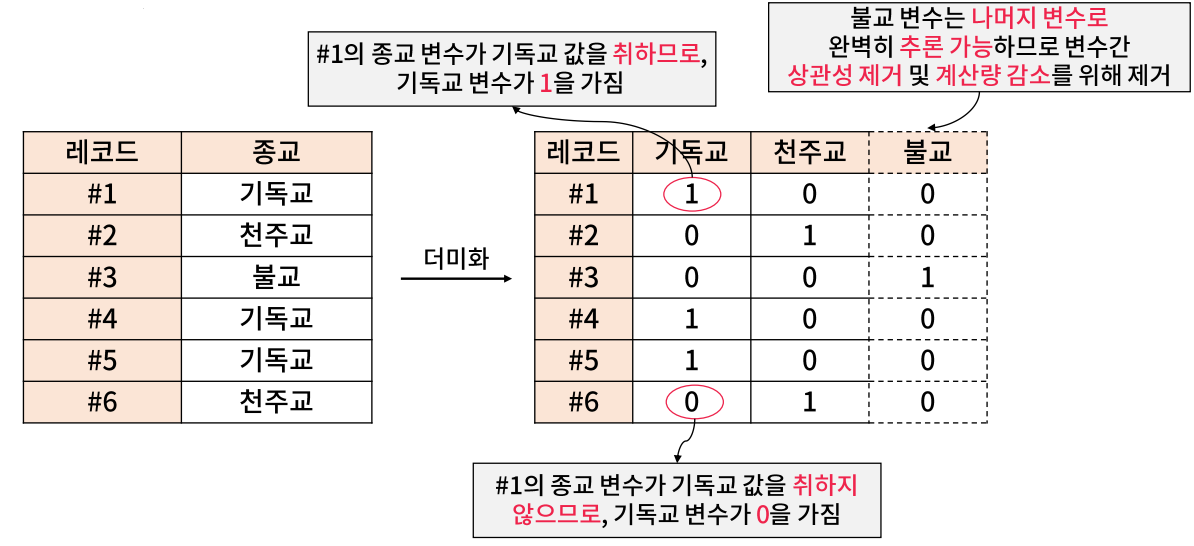

## 관련 문법 : feature_engine.encoding.OneHotCategoricalEncoder
---
- dummy화를 하기 위한 함수
- sklearn의 preprocessing model 을 통한 결측치 처리 과정과 비슷 (모델생성 -> 학습 -> train/test 데이터에 transform)
- Feature-engine 는 in active development이기 때문에 version 에 따라 import 함수명이 바뀔 수 있다.
---

**파라미터**

---
- variables : dummy화 대상이 되는 범주형 변수의 이름 list(`해당 변수는 반드시 str/object 타입 이어야만 한다.`)
- drop_last : 한 범주 변수로 만든 dummy변수 중 마지막에 생성한 dummy변수를 제거할지 여부
- top_categories : 한 범주 변수로 만든 dummy 변수 개수를 설정 (빈도를 기준으로 자른다.)
    - 한 범주 변수에서 가지는 상태공간이 100이면, 그중 빈도가 높은 상위 10개만 사용하는 식
---
- **장점** 
    - 사용이 간편하다.(크게 고려해야할 사항 없음)
- **단점** 
    - 범주변수가 가지는 값이 많을때, dummy화 하는 과정에서 추가되는 변수가 너무 많아질 수 있다.(차원의 저주 문제)
    - 한 범주변수가 가지는 값이 너무 많을때(상태공간이 크면), dummy화를 할때 데이터가 너무 희소해질 수 있다.
    - 희소한 데이터와 연속형 데이터가 같이 있으면 모델링을 하는 것이 상당히 어렵다.
---
**FYI**
- pandas.get_dummies() 함수로도 동일하게 dummy화를 할 수 있다. 
- 하지만 train data에 포함된 이 방식은 `범주형 변수를 처리한 방식`으로 `새로 들어온 데이터에 적용이 불가능` 하기 때문에 실제적인 활용이 어렵다. (pandas 함수들은 인스턴스화되어 처리하는 방식이 아니기 때문)
    - 위의 그림을 기준으로 볼때 좌측에 있는 데이터가 train data이고(종교가 다양), 새로운 들어온 데이터는 `천주교`만 있다고 할때, 기존 train data로 생성한 get_dummies와 새로 들어온 데이터로 생성한 get_dummies는 다른 형태가 된다.
---

전체 데이터가 모두 범주형 이므로 dummy화를 위해 전부 string 타입으로 변경해준다.

In [10]:
Train_X = Train_X.astype(str)

In [11]:
from feature_engine.encoding import OneHotEncoder as OHE

# 모델 생성(인스턴스화)
# drop_last로 맨마지막 dummy는 생략
# feature_engine의 variable은 list이다
dummy_model = OHE(variables = Train_X.columns.tolist(), #train data의 변수명 list화
                 drop_last = True)

#fitting
dummy_model.fit(Train_X)

#transform
d_Train_X = dummy_model.transform(Train_X)
d_Test_X = dummy_model.transform(Test_X)

In [12]:
# 더미화를 한 뒤의 모델 효과 테스트
# KNN 활용
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(d_Train_X, Train_Y)
pred_Y = model.predict(d_Test_X)

# 실제값과 예측값의 차이 확인 (f1 score)
from sklearn.metrics import f1_score
print("f1_score of KNN with dummy variables :", f1_score(Test_Y, pred_Y))

f1_score of KNN with dummy variables : 0.16666666666666666


- 아래의 연속형 변수와의 절대적 비교를 위해 KNN의 방법을 default로 두었다. 
- dummy화한 변수는 차원이 늘어나고, 희소해지는 경향이 있기 때문에 KNN성향이 떨어질 가능성이 상대적으로 더 크다.
- 따라서 dummy화한 변수로 반드시 KNN을 써야하는 경우라면 위의 model처럼 KNN()으로 default값으로 두기보다는, metric으로 jaccard등을 사용하면 현재 상태보다는 조금 더 높은 성능을 기대해 볼 수 있을 것이다.


# 범주형 변수 변환방법(2) - 연속형 변수로 치환
---
- 범주형 변수의 상태 공간 크기가 클 때, dummy화는 `과하게 많은 변수를 추가` 해서 `차원의 저주` 문제로 이어지는 문제가 있다.
- label정보를 활용해 범주 변수를 `연속형 변수로 치환` 하면 기존 변수가 가지는 `정보가 일부 손실될 우려`가 있고, `활용이 어렵다`는 단점이 있으나, 차원의 크기가 변하지 않으며 `더 효율적인 변수` 로 치환할 수 있다는 장점이 있다.
---
정리하자면, 


**장점**
- 지도학습의 경우 Y를 고려한 변환이기 때문에 모델 성능이 좋아지는 경우가 종종 있다.
- 차원을 변화시키기 않기 때문에 `차원의 저주 문제` 에 빠지지 않는다.
- 범주형 변수를 연속형 변수로 변환시키기 때문에 `더 많은 정보를 포함할 가능성` 이 생긴다.

**단점**
- 기존 변수가 가지는 정보를 손실할 가능성이 있다.
- 아래의 그림에서 X 에 따른 Y평균값이 모두 다르지만, 만약 동일한 값이 존재한다면? (A도 200, B도 200이면?)
    - A와 B 는 서로 다른 데이터이지만, 동일한 값이 입력되어 정보 손실이 발생한다.
---
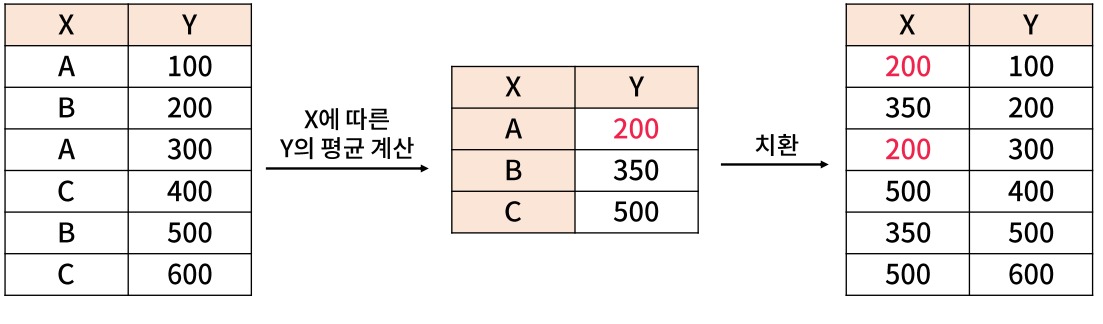

- group by 를 통해 X에 따른 Y의 평균을 계산할 수 있다.
---

X에 따른 Y의 평균을 계산해야 아므로 train data의 X, Y값을 다시 이어 붙인다.

In [13]:
Train_df = pd.concat([Train_X, Train_Y], axis = 1)

for col in Train_X.columns: # 보통은 전체 변수 중 범주 변수만 순회(현재 사용데이터는 모든 변수가 범주형)
    # col에 따른 Class의 평균을 나타내는 사전 (replace를 쓰기 위해, dict로 만듦)
    # key가 column , value는 Class에 따른 mean인 dict
    temp_dict = Train_df.groupby(col)['Class'].mean().to_dict() 
    
    Train_df[col] = Train_df[col].replace(temp_dict) # 변수 치환    
    # 테스트 데이터도 같이 치환해줘야 함 (나중에 활용하기 위해서는 저장도 필요)
    Test_X[col] = Test_X[col].astype(str).replace(temp_dict) 

In [14]:
# 변수값들이 연속형으로 변경되었다.
Train_df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
620,-0.916667,-0.842424,-0.944186,-1.000000,-0.944186,-0.919643,-1
73,-1.000000,-1.000000,-0.944186,-1.000000,-0.935780,-0.914692,-1
749,-0.853333,-1.000000,-0.934579,-0.889908,-0.935780,-0.919643,-1
750,-0.853333,-1.000000,-0.934579,-0.889908,-0.953488,-1.000000,-1
96,-1.000000,-1.000000,-0.934579,-1.000000,-0.944186,-1.000000,-1


해당 변수들은 dummy화한 변수들에 비해 Class값과의 관련성이 더욱 명확하다.

위에서 dummy화 했던 변수의 값을 보면 아래와 같다.
![](이미지34.png)

- 이때, index 56의 값을 보면 Buying이 vhigh(very high)이다. 그리고 연속형으로 변환한 결과를 보면 동일 index의 Class에 대한 Buying의 mean값이 -1이다.
- 그리고 Class는 1 또는 -1의 값 뿐이다.
- 따라서 "Buying이 vhigh 이면 무조건 -1이다." 라고 추론할 수 있다.
- 이처럼 범주형 변수를 연속형 변수로 변환하면 label과 관련된 직접적인 정보를 포함하고 있음을 알 수 있다.

모델 학습 위해 Train / Test split

In [15]:
Train_X = Train_df.drop('Class', axis = 1)
Train_Y = Train_df['Class']

In [16]:
# 치환한 뒤의 모델 테스트
model = KNN().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)

print("f1_score of KNN with continous variable :", f1_score(Test_Y, pred_Y))
# 라벨을 고려한 전처리이므로 더미화보다 좋은 결과가 나온 것을 확인할 수 있다. (dummy화한 f1 score는 0)

f1_score of KNN with continous variable : 0.25
